In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns

sns.set_style("darkgrid")


class Foo:
    def __init__(self, g=0.5, a=0.5):
        # parameters
        self.gamma = g  # discounting rate
        self.alpha = a
        self.rewardSize = -1
        self.gridSize = 5
        self.terminationStates = [[0, 0], [self.gridSize - 1, self.gridSize - 1]]
        self.actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
        self.numIterations = 10000
        # initialization
        self.V = np.zeros((self.gridSize, self.gridSize))
        self.returns = {(i, j): list() for i in range(self.gridSize) for j in range(self.gridSize)}
        self.deltas = {(i, j): list() for i in range(self.gridSize) for j in range(self.gridSize)}
        self.states = [[i, j] for i in range(self.gridSize) for j in range(self.gridSize)]

    def __generateEpisode(self):
        initState = random.choice(self.states[1:-1])
        episode = []
        while list(initState) not in self.terminationStates:
            finalState, action = self.__take_action(initState)
            episode.append([list(initState), action, self.rewardSize, list(finalState)])
            initState = finalState
        return episode

    def __take_action(self, current_state):
        action = np.array(random.choice(self.actions))
        next_state = np.array(current_state) + action
        if min(next_state) == -1 or max(next_state) == self.gridSize:  # cross wall
            return current_state, action  # stay at s
        else:
            return tuple(next_state), action  # go to s'

    def TD_method(self, verbose=0, plot_heatmap=False):
        current_state = tuple(random.choice(self.states[1:-1]))
        while True:
            if list(current_state) in self.terminationStates:  # we reached the end
                break
            next_state, action = self.__take_action(current_state)

            TD_target = self.rewardSize + self.gamma * self.V[next_state]
            TD_error = TD_target - self.V[current_state]
            delta = self.alpha * TD_error  # delta is the improvement of state s
            self.deltas[current_state].append(float(np.abs(delta)))
            
            self.V[current_state] += delta  # improv state value
            current_state = next_state  # and update state s as next_state
        if plot_heatmap:
            self.__plot_heatmap()

    def MC_method(self, verbose=0, plot_heatmap=False):
        episode = self.__generateEpisode()
        G = 0
        visited_states = [step[0] for step in episode]
        while episode:
            [current_state, action, reward, next_state] = episode.pop(-1)
            G = self.gamma * G + reward  # rewards accumulated at here
            previous_states = visited_states[:len(episode)]
            if current_state not in previous_states:  # V(s) = avg(returns(G))
                s = tuple(current_state)
                self.returns[s].append(G)  # append gain to state s only one time for each episode
                tmp = np.average(self.returns[s])
                self.deltas[s].append(np.abs(self.V[s] - tmp))  # recode the state value upgrades of each state
                self.V[s] = tmp  # upgrade the value of state s
        if plot_heatmap:
            self.__plot_heatmap()

    def plot_series(self, l, x=16, y=8):
        fig, axes = plt.subplots(self.gridSize, self.gridSize, sharex=True, sharey=True, figsize=(x, y))  # 
        fig.suptitle('state-value improvements')
        for i in range(self.gridSize):
            for j in range(self.gridSize):
                sns.lineplot(ax=axes[i][j], data=foo.deltas[(i,j)][:l])
                axes[i][j].set_title("state s=%s" % (str((i,j))))


    def __plot_heatmap(self):
        df = pd.DataFrame(self.V)  # turn 2-d array to dataframe
        fig, ax = plt.subplots(figsize=(4, 3))  # figure size
        sns.heatmap(df, ax=ax, fmt=".2f", annot=True)  # display both color and value

# TD_method V(s) heatmap

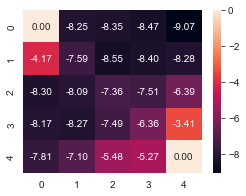

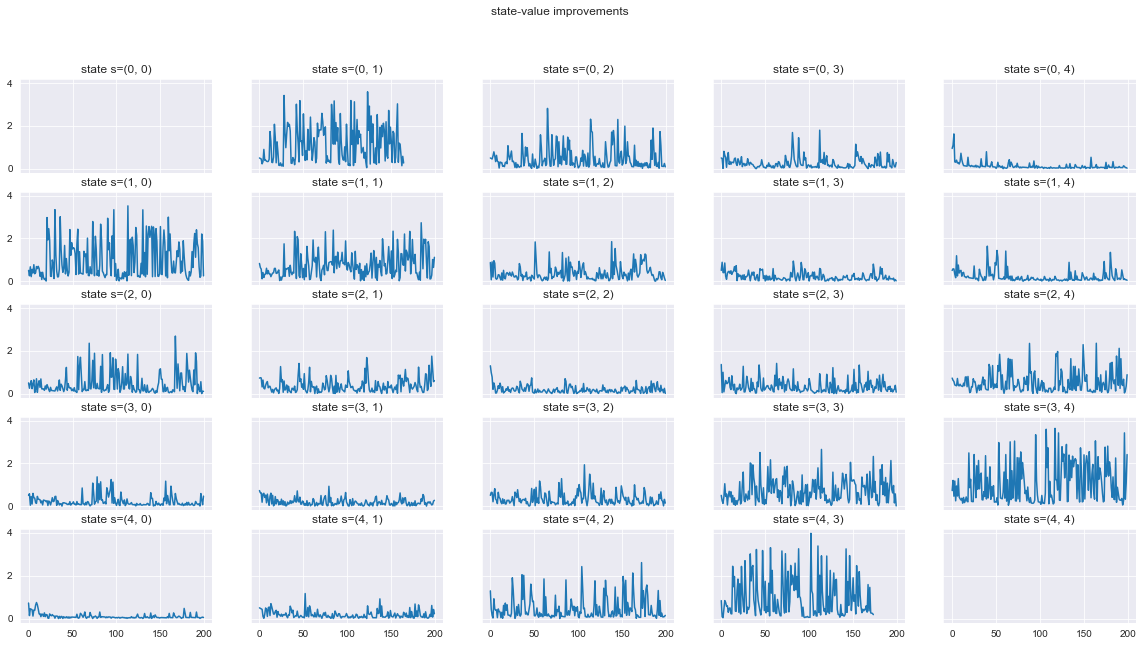

In [4]:
foo = Foo(g=0.9, a=0.5)
for i in range(200):  # take another 1000 iteration
    foo.TD_method(verbose=0, plot_heatmap=False)
foo.TD_method(verbose=0, plot_heatmap=True)
foo.plot_series(200, x=20, y=10)

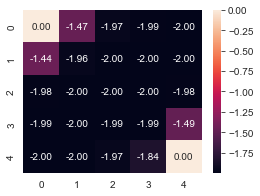

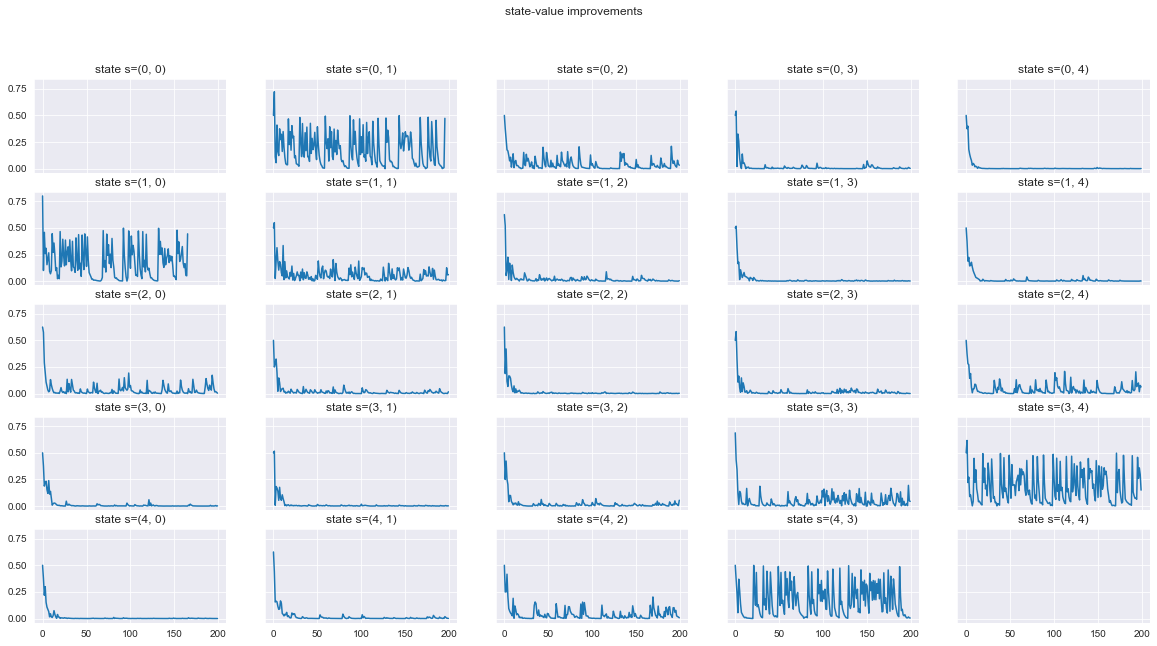

In [3]:
foo = Foo(g=0.5, a=0.5)
for i in range(200):  # take another 1000 iteration
    foo.TD_method(verbose=0, plot_heatmap=False)
foo.TD_method(verbose=0, plot_heatmap=True)
foo.plot_series(200, x=20, y=10)

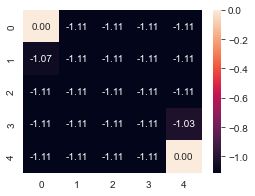

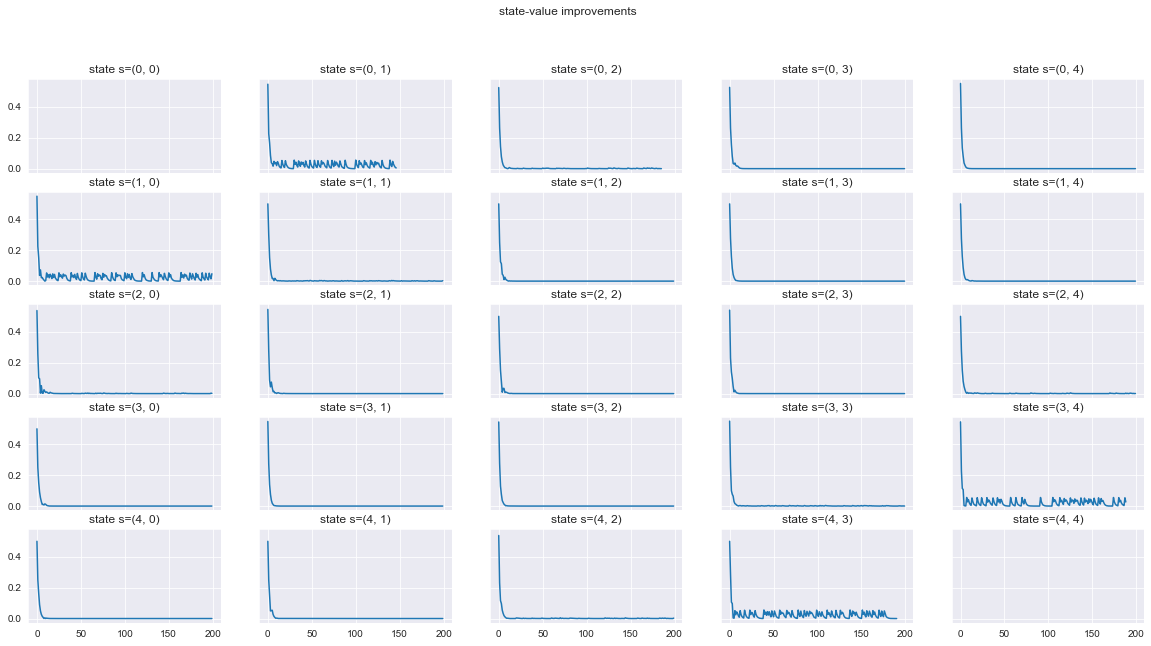

In [4]:
foo = Foo(g=0.1, a=0.5)
for i in range(200):  # take another 1000 iteration
    foo.TD_method(verbose=0, plot_heatmap=False)
foo.TD_method(verbose=0, plot_heatmap=True)
foo.plot_series(200, x=20, y=10)

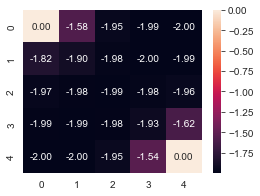

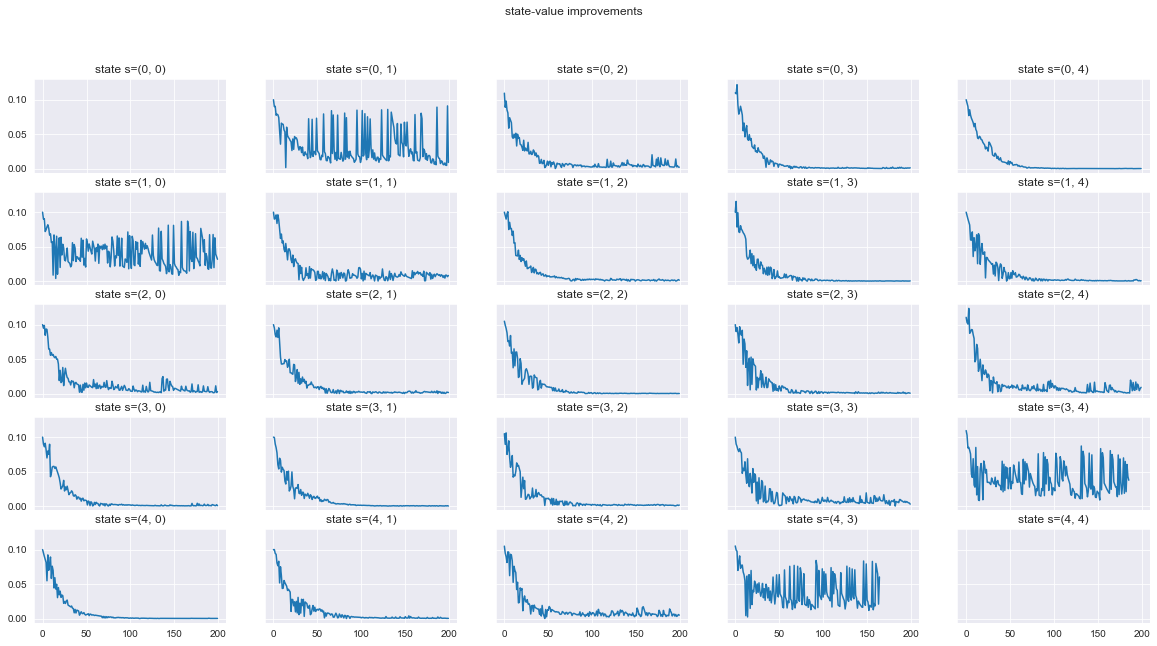

In [5]:
foo = Foo(g=0.5, a=0.1)
for i in range(200):  # take another 1000 iteration
    foo.TD_method(verbose=0, plot_heatmap=False)
foo.TD_method(verbose=0, plot_heatmap=True)
foo.plot_series(200, x=20, y=10)

# MC_method V(s) heatmap

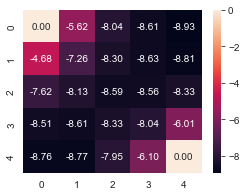

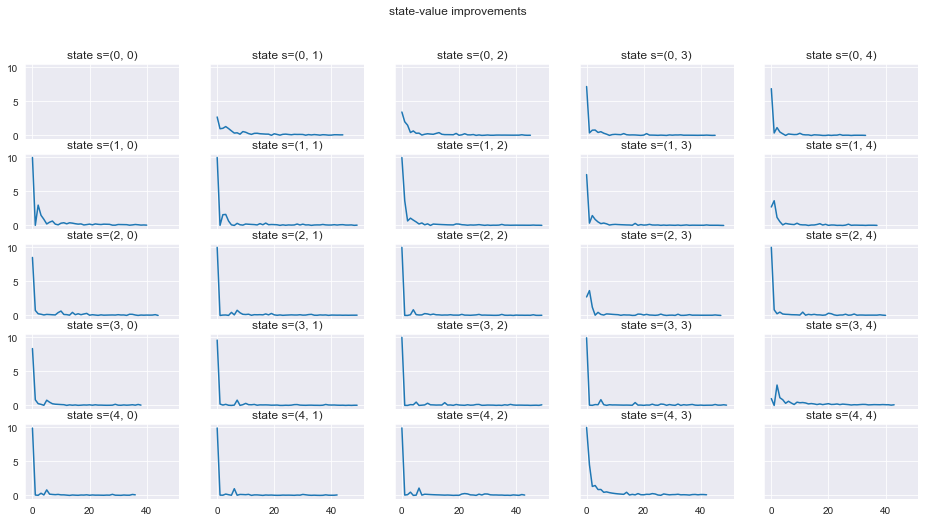

In [5]:
foo = Foo(g=0.9, a=0.5)
for i in range(100):  # take another 1000 iteration
    foo.MC_method(verbose=0, plot_heatmap=False)
foo.MC_method(verbose=0, plot_heatmap=True)
foo.plot_series(50)

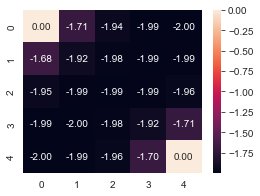

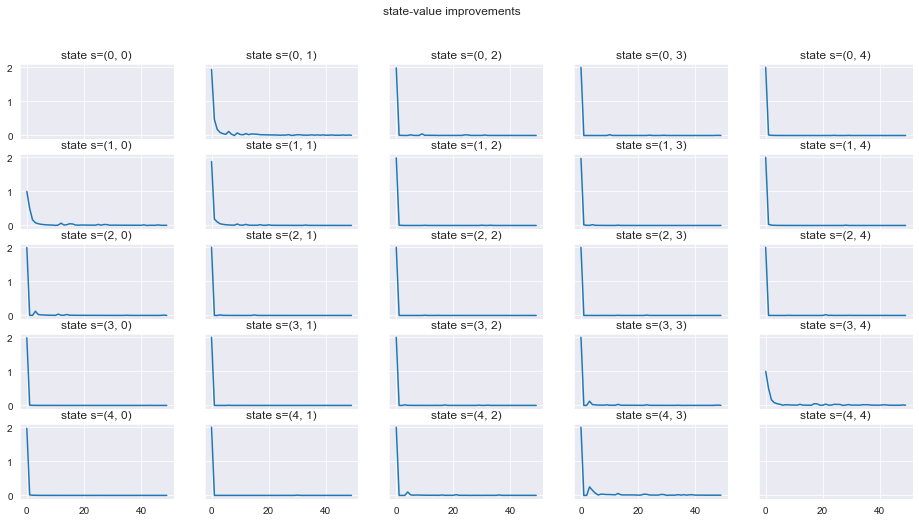

In [7]:
foo = Foo(g=0.5, a=0.5)
for i in range(1000):  # take another 1000 iteration
    foo.MC_method(verbose=0, plot_heatmap=False)
foo.MC_method(verbose=0, plot_heatmap=True)
foo.plot_series(50)

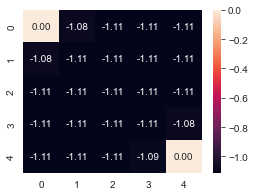

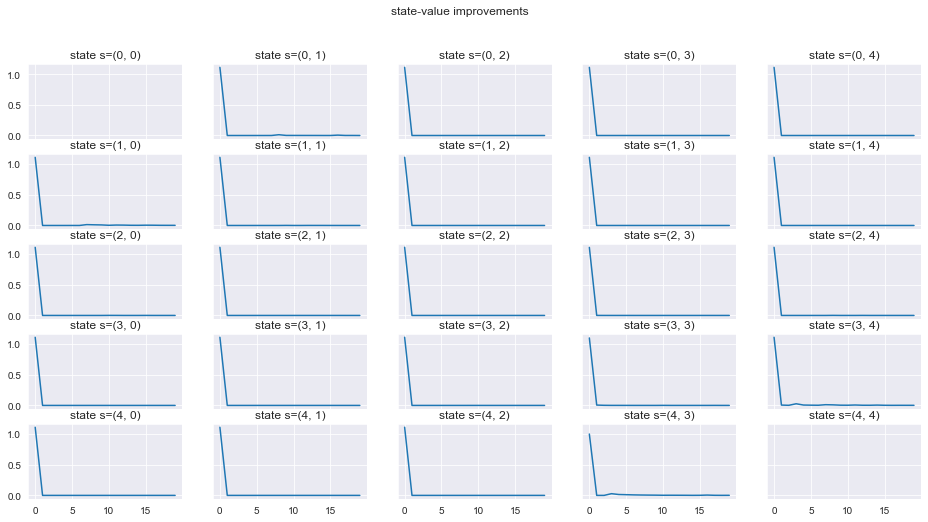

In [8]:
foo = Foo(g=0.1, a=0.5)
for i in range(1000):  # take another 1000 iteration
    foo.MC_method(verbose=0, plot_heatmap=False)
foo.MC_method(verbose=0, plot_heatmap=True)
foo.plot_series(20)

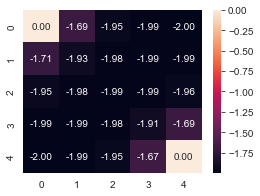

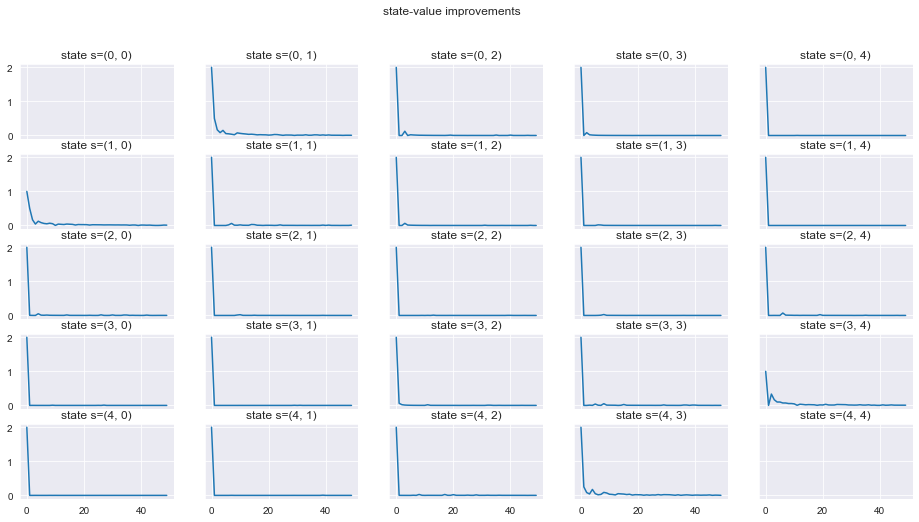

In [9]:
foo = Foo(g=0.5, a=0.1)
for i in range(1000):  # take another 1000 iteration
    foo.MC_method(verbose=0, plot_heatmap=False)
foo.MC_method(verbose=0, plot_heatmap=True)
foo.plot_series(50)